# 基本資料查找
安裝模組openpyxl

In [1]:
!pip install openpyxl

欄位(column):工作表的欄位名稱是A、B、…等。

列(row):工作表的列名稱是1、2、…等。

儲存格(cell):工作表內的每一個格子稱儲存格,用(欄名,列名)代表。

## 列出工作表

In [1]:
import openpyxl

fn = './input file/銷售業績表.xlsx'
wb = openpyxl.load_workbook(fn)     # wb是Excel檔案物件
print(type(wb))

# 取得工作表名稱
print("所有工作表     = ", wb.sheetnames)
print("目前工作表     = ", wb.active)
print("目前工作表名稱 = ", wb.active.title)


# 也可以使用for跑所有工作表
for sheet in wb.sheetnames:
    print("工作表名稱 = ", sheet)

<class 'openpyxl.workbook.workbook.Workbook'>
所有工作表     =  ['2024Q1', '2024Q2', '2024Q3']
目前工作表     =  <Worksheet "2024Q3">
目前工作表名稱 =  2024Q3
工作表名稱 =  2024Q1
工作表名稱 =  2024Q2
工作表名稱 =  2024Q3


## 切換工作表

In [2]:
import openpyxl

fn = './input file/銷售業績表.xlsx'
wb = openpyxl.load_workbook(fn)
print("預設的工作表名稱 = ", wb.active.title)
ws0 = wb.worksheets[0]
ws1 = wb.worksheets[1]
ws2 = wb.worksheets[2]
print("特定工作表的名稱 = ", ws0.title)
print("特定工作表的名稱 = ", ws1.title)
print("特定工作表的名稱 = ", ws2.title)

預設的工作表名稱 =  2024Q3
特定工作表的名稱 =  2024Q1
特定工作表的名稱 =  2024Q2
特定工作表的名稱 =  2024Q3


## 新增一個工作表

In [3]:
import openpyxl

wb = openpyxl.Workbook()                # 建立空白的活頁簿
ws = wb.active                          # 獲得目前工作表
print("目前工作表名稱 = ", ws.title)    # 列印目前工作表
ws.title = 'My sheet'                   # 更改目前工作表名稱
print("新工作表名稱   = ", ws.title)    # 列印新的目前工作表
wb.save('./output file/新增一個工作表.xlsx')                  # 將活頁簿儲存
wb.close()

目前工作表名稱 =  Sheet
新工作表名稱   =  My sheet


## 找出目前資料夾的excel檔案

In [6]:
import glob

print("列出目前資料夾的Excel檔案")
for file in glob.glob('./input file/*.xlsx'):
    print(file)
print()
print("列出目前資料夾out1開頭的Excel檔案")
for file in glob.glob('out1*.xlsx'):
    print(file)
print()
print("列出目前資料夾out1_開頭的Excel檔案")
for file in glob.glob('out1_?.xlsx'):
    print(file)

列出目前資料夾的Excel檔案
./input file\銷售業績表.xlsx

列出目前資料夾out1開頭的Excel檔案

列出目前資料夾out1_開頭的Excel檔案


### 也可以使用關鍵字搜尋EXCEL

In [7]:
import glob

key = input('請輸入關鍵字 : ')
keyword = '*' + key + '*.xlsx'  # 組成關鍵字的字串
files = glob.glob(keyword)
for fn in files:
    print(fn)

In [ ]:
import glob

mydir = input('請輸入指定資料夾 : ')
key = input('請輸入關鍵字 : ')
keyword = mydir + '*' + key + '*.xlsx'
files = glob.glob(keyword)
for fn in files:
    print(fn)


### 使用os.walk()
glob 模組來搜尋符合特定模式的檔案。它只會搜尋指定資料夾中的檔案，不會遞迴搜尋子資料夾。

1. 目前工作資料夾名稱(dirName)。
2. 目前工作資料夾底下的子資料夾串列(sub_dirNames)。
3. 目前工作資料夾底下的檔案串列(fileNames)。

```
for dirName,sub_dirNames,fileNames in os.walk(資料夾路徑)
```


In [8]:
mydir = input('請輸入指定資料夾 : ')
key = input('請輸入關鍵字 : ')
for dirName, sub_dirNames, fileNames in os.walk(mydir):
    print(f"目前資料夾名稱 : {dirName}")
    keyword = dirName + '\*' + key + '*.xlsx'
    files = glob.glob(keyword)
    for fn in files:
        print(fn)

NameError: name 'os' is not defined

# 操作工作表

## 建立工作表

In [10]:
import openpyxl

wb = openpyxl.Workbook()                    # 建立空白的活頁簿
print("所有工作表名稱 = ", wb.sheetnames)   # 列印所有工作表

wb.create_sheet(title='First sheet')         # 建立新工作表
print("所有工作表名稱 = ", wb.sheetnames)   # 列印所有工作表

ws = wb.active                              # 取得目前工作表
print("目前工作表名稱 = ", ws.title)        # 列印目前工作表
wb.save('./output file/一共兩個工作表.xlsx')                      # 將活頁簿儲存

所有工作表名稱 =  ['Sheet']
所有工作表名稱 =  ['Sheet', 'First sheet']
目前工作表名稱 =  Sheet


## 複製工作表

In [11]:
import openpyxl

fn = "./input file/銷售業績表.xlsx"
wb = openpyxl.load_workbook(fn)             # 開啟活頁簿
print("所有工作表名稱 = ", wb.sheetnames)   # 列印所有工作表
src = wb.active
dst2 = wb.copy_worksheet(src)
dst2.title = "複製一份新的工作表" # 如果名稱要更改，複製的話只能額外寫 
print("所有工作表名稱 = ", wb.sheetnames)   # 列印所有工作表
wb.save('./output file/從銷售業績表多複製一個工作表.xlsx')                      # 將活頁簿儲存

所有工作表名稱 =  ['2024Q1', '2024Q2', '2024Q3']
所有工作表名稱 =  ['2024Q1', '2024Q2', '2024Q3', '複製一份新的工作表']


有時候要做一月份複製12份這樣

In [13]:
import openpyxl


wb = openpyxl.Workbook()                    # 建立空白的活頁簿
print("所有工作表名稱 = ", wb.sheetnames)   # 列印所有工作表
src = wb.active
src.title = "1月份"
print("更改後，所有工作表名稱 = ", wb.sheetnames)   # 列印所有工作表
for i in range(2,13):
    dst = wb.copy_worksheet(src)
    month = str(i) + "月"
    dst.title = month
print("所有工作表名稱 = ", wb.sheetnames)   # 列印所有工作表
wb.save('./output file/建立12月分.xlsx')                     # 將活頁簿儲存

所有工作表名稱 =  ['Sheet']
更改後，所有工作表名稱 =  ['1月份']
所有工作表名稱 =  ['1月份', '2月', '3月', '4月', '5月', '6月', '7月', '8月', '9月', '10月', '11月', '12月']


## 刪除工作表

可以使用remove或del，但主要還是remove

In [14]:
import openpyxl

fn = "./output file/一共兩個工作表.xlsx"
wb = openpyxl.load_workbook(fn)             # 開啟活頁簿
print("所有工作表名稱 = ", wb.sheetnames)   
wb.remove(wb['Sheet']) # 使用名稱刪除
# wb.remove(wb.worksheets[1]) # 使用索引刪除

print("所有工作表名稱 = ", wb.sheetnames)  

所有工作表名稱 =  ['Sheet', 'First sheet']
所有工作表名稱 =  ['First sheet']


## 更改工作表顏色

In [16]:
fn = "./input file/銷售業績表.xlsx"
wb = openpyxl.load_workbook(fn)             # 開啟活頁簿
print("所有工作表名稱 = ", wb.sheetnames)   

ws1 = wb['2024Q1']
ws1.sheet_properties.tabColor = "0000FF"
ws2 = wb['2024Q2']
ws2.sheet_properties.tabColor = "00FF00"
ws3 = wb['2024Q3']
ws3.sheet_properties.tabColor = "FF0000"

wb.save('./output file/彩色的銷售業績表.xlsx')                      # 將活頁簿儲存

所有工作表名稱 =  ['2024Q1', '2024Q2', '2024Q3']


## 保護/取消工作表

In [19]:
import openpyxl

fn = "./output file/一共兩個工作表.xlsx"
wb = openpyxl.load_workbook(fn)

ws = wb.active # 獲取當前活躍的工作表

# 啟用保護
# ws.protection.sheet = True
# ws.protection.enable()
# 設定密碼
# ws.protection.password = "123456"

# 取消保護
ws.protection.sheet = False


wb.save(fn)

## 建立多個工作表

In [24]:
import openpyxl
from openpyxl.utils import get_column_letter

wb = openpyxl.Workbook()
ws1 = wb.active
ws1.title = "DataRange"
for row in range(1, 5):
    ws1.append(range(30))

# 輸出資料
for row in wb["DataRange"].iter_rows():
    for cell in row:
        print(f"{cell.value}", end=" ")
    print()

ws2 = wb.create_sheet(title="School")
ws2['B4'] = "國立成功大學"

# 輸出資料
for row in wb["School"].iter_rows():
    for cell in row:
        print(f"{cell.value}", end=" ")
    print()


ws3 = wb.create_sheet(title="Data")
for row in range(5, 10):
    for col in range(1, 10):
        ws3.cell(column=col,row=row,value="{0}".format(get_column_letter(col)))

# 輸出資料
for row in wb["Data"].iter_rows():
    for cell in row:
        print(f"{cell.value}", end=" ")
    print()



wb.save("示範一次創建多個工作表.xlsx")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 
None None 
None None 
None None 
None 國立成功大學 
None None None None None None None None None 
None None None None None None None None None 
None None None None None None None None None 
None None None None None None None None None 
A B C D E F G H I 
A B C D E F G H I 
A B C D E F G H I 
A B C D E F G H I 
A B C D E F G H I 


## 練習：將xlsx裡面的工作表個別獨立

In [27]:
# 將xlsx裡面所有工作表個別獨立成
import openpyxl 

fn = "./input file/各公司資料.xlsx"                 # 來源活頁簿
wb = openpyxl.load_workbook(fn)
ws = wb.active
print("所有工作表名稱 = ", wb.sheetnames)   # 列印所有工作表

for i in range(len(wb.sheetnames)):
    ws = wb.worksheets[i]
    fname = ws.title
    new_wb = openpyxl.Workbook()    # 建立目的的活頁簿
    new_ws = new_wb.active
    for data in ws.iter_rows(min_row=1,max_row=ws.max_row,
            min_col=1,max_col=ws.max_column, values_only=True):
        value = list(data)
        new_ws.append(value)        # 寫入目的活頁簿
    fname = fname + '.xlsx'
    new_wb.save(fname)              # 儲存結果

所有工作表名稱 =  ['總公司', '台北店', '新竹店', '台中店', '高雄店']


# 讀取/寫入儲存格

## 儲存格基本單位
ws["行列"]，例如：ws["A2"]

In [28]:
import openpyxl
import time
fn = "示範用excel.xlsx"
wb = openpyxl.Workbook()    # 建立空白的活頁簿
ws = wb.active              # 取得目前工作表
ws['A2'] = 'Apple'
ws['A3'] = 'Orange'
ws['B2'] = 200
ws['B3'] = 150
ws['B4'] = time.strftime("%Y/%m/%d")

# 取出數值
print("儲存格B2 = ", ws['B2'].value)    # B2 

# 取出該資料欄位的行、列、行列
print("儲存格B2 = ", ws['B2'].coordinate)    # B2
print("儲存格B2 = ", ws['B2'].row)    # B
print("儲存格B2 = ", ws['B2'].column)    # 2 
wb.save("./output file/示範用excel.xlsx")      # 將活頁簿儲存

儲存格B2 =  200
儲存格B2 =  B2
儲存格B2 =  2
儲存格B2 =  2


## 取得資料表的欄數(columns)、列數(rows)

- min_row：可以回傳工作表有資料的最小列數。
- max_row：可以回傳工作表有資料的最大列數。
- min_column：可以回傳工作表有資料的最小欄數。
- max_column：可以回傳工作表有資料的最大欄數。

In [38]:
import openpyxl
fn = "./input file/萵苣會員資料.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active

# 輸出資料
for row in ws.iter_rows():
    for cell in row:
        print(f"{cell.value}", end=" ")
    print()

print(f"工作表欄數 = {ws.max_column}")    
print(f"工作表列數 = {ws.max_row}")    


萵苣會員資料 None None None None 
姓名 地區 性別 身高 身份 
洪冰儒 士林 男 170 會員 
洪雨星 中正 男 165 會員 
洪星宇 信義 男 171 非會員 
洪冰雨 信義 女 162 會員 
郭孟華 士林 女 165 會員 
陳新華 信義 男 178 會員 
謝冰 士林 女 166 會員 
工作表欄數 = 5
工作表列數 = 9


In [34]:
# 取得A欄（姓名）
for cell in list(ws.columns)[0]:    # A欄
    print(cell.value)

萵苣會員資料
姓名
洪冰儒
洪雨星
洪星宇
洪冰雨
郭孟華
陳新華
謝冰


In [35]:
# 取得第二列
for cell in list(ws.rows)[2]:       # 索引是2
    print(cell.value, end=' ')  

洪冰儒 士林 男 170 會員 

In [37]:
# 逐條輸出
for row in ws.rows:
    for cell in row:
        print(cell.value, end=' ')
    print()
    
print("-----換個方向-----")

for col in ws.columns:
    for cell in col:
        print(cell.value, end=' ')
    print()

萵苣會員資料 None None None None 
姓名 地區 性別 身高 身份 
洪冰儒 士林 男 170 會員 
洪雨星 中正 男 165 會員 
洪星宇 信義 男 171 非會員 
洪冰雨 信義 女 162 會員 
郭孟華 士林 女 165 會員 
陳新華 信義 男 178 會員 
謝冰 士林 女 166 會員 
-----換個方向-----
萵苣會員資料 姓名 洪冰儒 洪雨星 洪星宇 洪冰雨 郭孟華 陳新華 謝冰 
None 地區 士林 中正 信義 信義 士林 信義 士林 
None 性別 男 男 男 女 女 男 女 
None 身高 170 165 171 162 165 178 166 
None 身份 會員 會員 非會員 會員 會員 會員 會員 


In [39]:
import openpyxl

fn = "./input file/萵苣會員資料.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active
print(f"工作表有資料最小列數 = {ws.min_row}")
print(f"工作表有資料最大列數 = {ws.max_row}")
print(f"工作表有資料最小欄數 = {ws.min_column}")
print(f"工作表有資料最大欄數 = {ws.max_column}")

工作表有資料最小列數 = 1
工作表有資料最大列數 = 9
工作表有資料最小欄數 = 1
工作表有資料最大欄數 = 5


## 針對某一區間資料輸出

In [40]:
import openpyxl

fn = "./input file/萵苣會員資料.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active
for col in ws.iter_cols(min_row=2,max_row=3,min_col=2,max_col=3):
    for cell in col:
        print(cell.value, end=' ')
    print()


地區 士林 
性別 男 


In [46]:
import openpyxl

fn = "./input file/萵苣會員資料.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active
for row in ws.iter_rows(min_row=1,max_row=6,min_col=1,max_col=2):
    for cell in row:
        print(cell.value, end=' ')
    print()

萵苣會員資料 None 
姓名 地區 
洪冰儒 士林 
洪雨星 中正 
洪星宇 信義 
洪冰雨 信義 


## 遍歷所有列（欄）資料
每一列資料都會是一個tuple

In [47]:
# 算是輸出的另一種寫法
import openpyxl

fn = "./input file/萵苣會員資料.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active
for row in ws.iter_rows():
    # 每一行的資料，接著用for曲吧他讀出來
    # print(type(row)) # <class 'tuple'>
    print(row)
    for cell in row:
        print(cell.value)

# print("-----------------------")

# for col in ws.iter_cols():
#     print(col)

(<Cell '工作表1'.A1>, <MergedCell '工作表1'.B1>, <MergedCell '工作表1'.C1>, <MergedCell '工作表1'.D1>, <MergedCell '工作表1'.E1>)
萵苣會員資料
None
None
None
None
(<Cell '工作表1'.A2>, <Cell '工作表1'.B2>, <Cell '工作表1'.C2>, <Cell '工作表1'.D2>, <Cell '工作表1'.E2>)
姓名
地區
性別
身高
身份
(<Cell '工作表1'.A3>, <Cell '工作表1'.B3>, <Cell '工作表1'.C3>, <Cell '工作表1'.D3>, <Cell '工作表1'.E3>)
洪冰儒
士林
男
170
會員
(<Cell '工作表1'.A4>, <Cell '工作表1'.B4>, <Cell '工作表1'.C4>, <Cell '工作表1'.D4>, <Cell '工作表1'.E4>)
洪雨星
中正
男
165
會員
(<Cell '工作表1'.A5>, <Cell '工作表1'.B5>, <Cell '工作表1'.C5>, <Cell '工作表1'.D5>, <Cell '工作表1'.E5>)
洪星宇
信義
男
171
非會員
(<Cell '工作表1'.A6>, <Cell '工作表1'.B6>, <Cell '工作表1'.C6>, <Cell '工作表1'.D6>, <Cell '工作表1'.E6>)
洪冰雨
信義
女
162
會員
(<Cell '工作表1'.A7>, <Cell '工作表1'.B7>, <Cell '工作表1'.C7>, <Cell '工作表1'.D7>, <Cell '工作表1'.E7>)
郭孟華
士林
女
165
會員
(<Cell '工作表1'.A8>, <Cell '工作表1'.B8>, <Cell '工作表1'.C8>, <Cell '工作表1'.D8>, <Cell '工作表1'.E8>)
陳新華
信義
男
178
會員
(<Cell '工作表1'.A9>, <Cell '工作表1'.B9>, <Cell '工作表1'.C9>, <Cell '工作表1'.D9>, <Cell '工作表1'.E9>)
謝冰
士林
女
166
會員


In [48]:
import openpyxl

fn = "./input file/萵苣會員資料.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active
for row in ws.iter_rows(values_only=True):
    print(row)
   

('萵苣會員資料', None, None, None, None)
('姓名', '地區', '性別', '身高', '身份')
('洪冰儒', '士林', '男', 170, '會員')
('洪雨星', '中正', '男', 165, '會員')
('洪星宇', '信義', '男', 171, '非會員')
('洪冰雨', '信義', '女', 162, '會員')
('郭孟華', '士林', '女', 165, '會員')
('陳新華', '信義', '男', 178, '會員')
('謝冰', '士林', '女', 166, '會員')


## 使用切片讀資料(推薦)

首先，你要先獲得資料表的左上角跟右下角座標

In [49]:
import openpyxl

fn = "./input file/萵苣會員資料.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active
print(ws.dimensions)

A1:E9


確認好範圍後，就可以讀資料拉~

In [51]:
import openpyxl

fn = "./input file/萵苣會員資料.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active
for row in ws.iter_rows():
    for cell in row:
        print(f"{cell.coordinate}", end=" ")
    print()
    

for row in ws['A1':'E9']:
    for cell in row:
        print(cell.value, end=' ')
    print()


A1 B1 C1 D1 E1 
A2 B2 C2 D2 E2 
A3 B3 C3 D3 E3 
A4 B4 C4 D4 E4 
A5 B5 C5 D5 E5 
A6 B6 C6 D6 E6 
A7 B7 C7 D7 E7 
A8 B8 C8 D8 E8 
A9 B9 C9 D9 E9 
萵苣會員資料 None None None None 
姓名 地區 性別 身高 身份 
洪冰儒 士林 男 170 會員 
洪雨星 中正 男 165 會員 
洪星宇 信義 男 171 非會員 
洪冰雨 信義 女 162 會員 
郭孟華 士林 女 165 會員 
陳新華 信義 男 178 會員 
謝冰 士林 女 166 會員 


也可以使用下列协片方式取得特定欄或列的儲存格區間的資料。

```
ws["B:D"] ＃取得B至D欄間的儲存格資料
ws[3:6] #取得第3至6列間的儲存格資料
```

In [54]:
import openpyxl

fn = "./input file/萵苣會員資料.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active
data_range = ws['B':'D']
for cols in data_range:
    for cell in cols:
        print(cell.value, end=' ')
    print()

None 地區 士林 中正 信義 信義 士林 信義 士林 
None 性別 男 男 男 女 女 男 女 
None 身高 170 165 171 162 165 178 166 


## 串列寫進資料

In [55]:
import openpyxl

wb = openpyxl.Workbook()        # 建立空白的活頁簿
ws = wb.active                  # 獲得目前工作表
row1 = ['數學','物理','化學']   # 定義串列資料
ws.append(row1)                 # 寫入串列
row2 = [98, 82, 89]             # 定義串列資料
ws.append(row2)                 # 寫入串列

# 輸出資料
for row in ws.iter_rows():
    for cell in row:
        print(f"{cell.value}", end=" ")
    print()
# wb.save('out3_27.xlsx')         # 將活頁簿儲存

數學 物理 化學 
98 82 89 


In [56]:
import openpyxl

wb = openpyxl.Workbook()    # 建立空白的活頁簿
ws = wb.active              # 獲得目前工作表
ws['A1'] = '明志科技大學'
rows = [                    # 定義串列資料
    ['數學', '物理', '化學'],
    [98, 82, 89],
    [79, 88, 90],
    [80, 78, 91]]                   
for row in rows:
    ws.append(row)          # 寫入串列

# 輸出資料
for row in ws.iter_rows():
    for cell in row:
        print(f"{cell.value}", end=" ")
    print()

# wb.save('out3_28.xlsx')     # 將活頁簿儲存

明志科技大學 None None 
數學 物理 化學 
98 82 89 
79 88 90 
80 78 91 


## 欄數與欄位名稱轉換

在 Excel中欄名稱是A、B、•Z、AA、AB、AC、⋯等，例如：1代表A、2代表B、26代表Z、27代表AA、28代表AB

如果工作表的欄位數很多時，很明顯我們無法很清楚了解到底索引是多少，例如：BC是多少？

```
get_column_letter（數值） ＃將數值轉成字母
column_index_from_string(字母) #將字母轉成數值
```

In [57]:
import openpyxl
from openpyxl.utils import get_column_letter, column_index_from_string

wb = openpyxl.Workbook()
ws = wb.active
print("欄數= ",get_column_letter(ws.max_column))
print("3   = ",get_column_letter(3))
print("27  = ",get_column_letter(27))
print("100 = ",get_column_letter(100))
print("800 = ",get_column_letter(800))

print("A   = ", column_index_from_string('A'))
print("E   = ", column_index_from_string('E'))
print("AA  = ", column_index_from_string('AA'))
print("AZ  = ", column_index_from_string('AZ'))
print("AAA = ", column_index_from_string('AAA'))

欄數=  A
3   =  C
27  =  AA
100 =  CV
800 =  ADT
A   =  1
E   =  5
AA  =  27
AZ  =  52
AAA =  703


# 欄與列的操作

## 插入列（橫）

插入列的語法如下：
```
ws.insert_rows(index, amount)
```
- index：插入的起始列。
- amount：插入的列數，如果省略 amount 相當於插入1列。

註 當執行插入列後，插入起始列後面的列號將會自動往下更動。

In [ ]:
import openpyxl

fn = "天空SPA客戶資料.xlsx"
wb = openpyxl.load_workbook(fn,data_only=True) # data_only=True 插入列的時候，如果該欄有公式，要保留
ws = wb.active

ws.insert_rows(4,1)
ws.insert_rows(6,1)
ws.insert_rows(8)       # 省略amount參數
ws.insert_rows(10)      # 省略amount參數
wb.save("out5_2.xlsx")

# 輸出資料
for row in ws.iter_rows():
    for cell in row:
        print(f"{cell.value}", end=" ")
    print()
# wb.save("out5_1.xlsx")

In [61]:
import openpyxl

fn = "./input file/員工薪資條.xlsx"
wb = openpyxl.load_workbook(fn,data_only=True) # data_only=True 插入列的時候，如果該欄有公式，要保留
ws = wb.active
# 輸出資料
for row in ws.iter_rows():
    for cell in row:
        print(f"{cell.value}", end=" ")
    print()

print()
print("將該檔案進行修改")
print()

data = ["員工編號","姓名","底薪","獎金","加班費",
        "健保費","勞保費","薪資金額"]
length = len(data)
row = 0;
for i in range(4,8):
    ws.insert_rows(i+row,2)
    for j in range(0, length):    # 寫入薪資項目 
        ws.cell(row=i+row+1,column=j+1,value=data[j])
    row = row + 2

# 輸出資料
for row in ws.iter_rows():
    for cell in row:
        print(f"{cell.value}", end=" ")
    print()

天線寶寶薪資表 None None None None None None None 
員工編號 姓名 底薪 獎金 加班費 健保費 勞保費 薪資金額 
A001 陳新華 56000 3000 0 -800 -600 57600 
A004 周湯家 49000 2000 0 -600 -500 49900 
A010 李家佳 46000 2000 0 -600 -500 46900 
A012 陳嘉許 43000 0 0 -600 -500 41900 
A015 張進一 38000 0 0 -600 -500 36900 

將該檔案進行修改

天線寶寶薪資表 None None None None None None None 
員工編號 姓名 底薪 獎金 加班費 健保費 勞保費 薪資金額 
A001 陳新華 56000 3000 0 -800 -600 57600 
None None None None None None None None 
員工編號 姓名 底薪 獎金 加班費 健保費 勞保費 薪資金額 
A004 周湯家 49000 2000 0 -600 -500 49900 
None None None None None None None None 
員工編號 姓名 底薪 獎金 加班費 健保費 勞保費 薪資金額 
A010 李家佳 46000 2000 0 -600 -500 46900 
None None None None None None None None 
員工編號 姓名 底薪 獎金 加班費 健保費 勞保費 薪資金額 
A012 陳嘉許 43000 0 0 -600 -500 41900 
None None None None None None None None 
員工編號 姓名 底薪 獎金 加班費 健保費 勞保費 薪資金額 
A015 張進一 38000 0 0 -600 -500 36900 


## 刪除列

刪除列的語法如下：
```
ws.delete_rows(index, amount)
```

上述參數說明如下：
- index：刪除的起始列。
- amount：刪除的列數，如果省略相當於刪除1列

下列是幾個刪除列可能的用法。
```
ws.delete_rows(列數)＃刪除指定列號
ws.delete_rows（起始列，列數）＃刪除多列
ws.delete_rows（1, ws.max_row） ＃刪除整個工作表的資料
```


In [64]:
import openpyxl

fn = "./input file/員工薪資條.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active

# 輸出資料
for row in ws.iter_rows():
    for cell in row:
        print(f"{cell.value}", end=" ")
    print()
    
ws.delete_rows(1, 4)
print()
print("將該檔案進行修改")
print()

# 輸出資料
for row in ws.iter_rows():
    for cell in row:
        print(f"{cell.value}", end=" ")
    print()

天線寶寶薪資表 None None None None None None None 
員工編號 姓名 底薪 獎金 加班費 健保費 勞保費 薪資金額 
A001 陳新華 56000 3000 0 -800 -600 =SUM(C3:G3) 
A004 周湯家 49000 2000 0 -600 -500 =SUM(C4:G4) 
A010 李家佳 46000 2000 0 -600 -500 =SUM(C5:G5) 
A012 陳嘉許 43000 0 0 -600 -500 =SUM(C6:G6) 
A015 張進一 38000 0 0 -600 -500 =SUM(C7:G7) 

將該檔案進行修改

A010 李家佳 46000 2000 0 -600 -500 =SUM(C5:G5) 
A012 陳嘉許 43000 0 0 -600 -500 =SUM(C6:G6) 
A015 張進一 38000 0 0 -600 -500 =SUM(C7:G7) 


In [65]:
# 將所有列刪除
import openpyxl

fn = "./input file/員工薪資條.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active

# 輸出資料
for row in ws.iter_rows():
    for cell in row:
        print(f"{cell.value}", end=" ")
    print()

ws.delete_rows(1, ws.max_row)
print()
print("刪除所有資料")
print()

# 輸出資料
for row in ws.iter_rows():
    for cell in row:
        print(f"{cell.value}", end=" ")
    print()


天線寶寶薪資表 None None None None None None None 
員工編號 姓名 底薪 獎金 加班費 健保費 勞保費 薪資金額 
A001 陳新華 56000 3000 0 -800 -600 =SUM(C3:G3) 
A004 周湯家 49000 2000 0 -600 -500 =SUM(C4:G4) 
A010 李家佳 46000 2000 0 -600 -500 =SUM(C5:G5) 
A012 陳嘉許 43000 0 0 -600 -500 =SUM(C6:G6) 
A015 張進一 38000 0 0 -600 -500 =SUM(C7:G7) 

刪除所有資料



## 插入欄

插入欄（行）的語法如下：
```
ws.insert_cols(index, amount)
```

上述參數說明如下：
- index：插入的起始欄。
- amount：插入的欄數，如果省略 amount 相當於插入1欄。

In [66]:
import openpyxl

fn = "./input file/萵苣會員資料.xlsx"
wb = openpyxl.load_workbook(fn,data_only=True)
ws = wb.active
for r in ws.iter_rows(values_only=True):  print(r)  # 執行前輸出
print()
ws.insert_cols(3,1)
ws['C3'] = '性別'
for r in ws.iter_rows(values_only=True):  print(r)  # 執行前輸出

('萵苣會員資料', None, None, None, None)
('姓名', '地區', '性別', '身高', '身份')
('洪冰儒', '士林', '男', 170, '會員')
('洪雨星', '中正', '男', 165, '會員')
('洪星宇', '信義', '男', 171, '非會員')
('洪冰雨', '信義', '女', 162, '會員')
('郭孟華', '士林', '女', 165, '會員')
('陳新華', '信義', '男', 178, '會員')
('謝冰', '士林', '女', 166, '會員')

('萵苣會員資料', None, None, None, None, None)
('姓名', '地區', None, '性別', '身高', '身份')
('洪冰儒', '士林', '性別', '男', 170, '會員')
('洪雨星', '中正', None, '男', 165, '會員')
('洪星宇', '信義', None, '男', 171, '非會員')
('洪冰雨', '信義', None, '女', 162, '會員')
('郭孟華', '士林', None, '女', 165, '會員')
('陳新華', '信義', None, '男', 178, '會員')
('謝冰', '士林', None, '女', 166, '會員')


## 刪除欄

刪除欄的語法如下：
```
ws.delete_cols(index, amount)
```
上述參數說明如下：
- index：刪除的起始欄。
- amount：刪除的欄數，如果省略相當於刪除1欄。

下列是幾個刪除欄可能的用法。
```
ws.delete_cols (欄數) #刪除指定欄號
ws.delete_cols（起始欄，欄數）＃刪除多欄
ws.delete_cols(1, ws.max_col) ＃刪除整個工作表的資料
```


In [72]:
import openpyxl

fn = "./input file/萵苣會員資料.xlsx"
wb = openpyxl.load_workbook(fn)
for r in ws.iter_rows(values_only=True):  print(r)  # 執行前輸出
ws = wb.active
ws.delete_cols(0)
# ws.delete_cols(0)
for r in ws.iter_rows(values_only=True):  print(r)  # 執行前輸出

('萵苣會員資料', None, None, None, None)
('姓名', '地區', '性別', '身高', '身份')
('洪冰儒', '士林', '男', 170, '會員')
('洪雨星', '中正', '男', 165, '會員')
('洪星宇', '信義', '男', 171, '非會員')
('洪冰雨', '信義', '女', 162, '會員')
('郭孟華', '士林', '女', 165, '會員')
('陳新華', '信義', '男', 178, '會員')
('謝冰', '士林', '女', 166, '會員')
(None, None, None, None)
('地區', '性別', '身高', '身份')
('士林', '男', 170, '會員')
('中正', '男', 165, '會員')
('信義', '男', 171, '非會員')
('信義', '女', 162, '會員')
('士林', '女', 165, '會員')
('信義', '男', 178, '會員')
('士林', '女', 166, '會員')


## 移動儲存格區間

移動儲存格區間的語法如下：
```
ws.move_range(cell_range, row, col, translate=False)
```

上述各參數意義如下：
- cell_range：要移動的儲存格區間。
- row：移動的列數，正值是往下移動，負值是往上移動。
- col：移動的欄數（行），正值是往右移動，負值是往左移動。
- translate：預設是 False，表示移動時不包含公式，也就是公式特性將消失只移動
數值。如果設為 False，移動時含有公式特性。

In [73]:
import openpyxl

fn = "./input file/萵苣會員資料.xlsx"
wb = openpyxl.load_workbook(fn,data_only=True)
ws = wb.active
for r in ws.iter_rows(values_only=True):  print(r)  # 執行前輸出
ws.move_range("A1:H6",rows=2,cols=1)
for r in ws.iter_rows(values_only=True):  print(r)  # 執行前輸出
# wb.save("out5_12.xlsx")

('萵苣會員資料', None, None, None, None)
('姓名', '地區', '性別', '身高', '身份')
('洪冰儒', '士林', '男', 170, '會員')
('洪雨星', '中正', '男', 165, '會員')
('洪星宇', '信義', '男', 171, '非會員')
('洪冰雨', '信義', '女', 162, '會員')
('郭孟華', '士林', '女', 165, '會員')
('陳新華', '信義', '男', 178, '會員')
('謝冰', '士林', '女', 166, '會員')
(None, None, None, None, None, None, None, None, None)
(None, None, None, None, None, None, None, None, None)
(None, '萵苣會員資料', None, None, None, None, None, None, None)
(None, '姓名', '地區', '性別', '身高', '身份', None, None, None)
(None, '洪冰儒', '士林', '男', 170, '會員', None, None, None)
(None, '洪雨星', '中正', '男', 165, '會員', None, None, None)
('郭孟華', '洪星宇', '信義', '男', 171, '非會員', None, None, None)
('陳新華', '洪冰雨', '信義', '女', 162, '會員', None, None, None)
('謝冰', '士林', '女', 166, '會員', None, None, None, None)


## 合併儲存格

合併儲存格可以使用 merge_cells（）函數，此函數的語法：
```
ws.merge_cells（儲存格區間）
```

In [90]:
import openpyxl
from openpyxl.styles import Font, Alignment

wb = openpyxl.Workbook()
ws = wb.active

ws.merge_cells('A1:B2')
ws['A1'].font = Font(name='Old English Text MT',
                     color='0000FF',
                     size=14)
ws['A1'].alignment = Alignment(horizontal='center',
                               vertical='center')
ws['A1'] = '國立成功大學'                      
wb.save("./output file/合併儲存格.xlsx")

查看效果

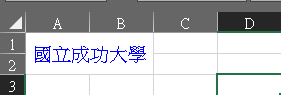

## 取消合併儲存格

取消合併儲存格可以使用 unmerge_cells（）函數，此函數的語法如下：
```
ws.unmerge__cells (儲存格區間）
```

In [94]:
import openpyxl
from openpyxl.styles import Font, Alignment

fn = "./output file/合併儲存格.xlsx"
wb = openpyxl.load_workbook(fn,data_only=True)
ws = wb.active

# 取消合併    
ws.unmerge_cells('A1:B2')
wb.save("./output file/取消合併儲存格.xlsx")

## 儲存格的備註

使用 openpyxl模組也可以為儲存格增加附註（comment），使用前需要導入Comment 模組：
`from openpyxl import Comment`

然後儲存格物件有 comment 屬性可以設定附註，設定方式需要使用 Comment（）函數，此函數的用法如下：
```
comment= Comment（”附註文字"，"作者"）
```

In [96]:
import openpyxl
from openpyxl.comments import Comment

wb = openpyxl.Workbook()
ws = wb.active
ws['B2'] = "天線寶寶"
comment = Comment("這是一部卡通","助教")
ws['B2'].comment = comment
print(f"註解 : {comment.text}")
print(f"作者 : {comment.author}")
wb.save("./output file/練習備註.xlsx")

註解 : 這是一部卡通
作者 : 助教


## 折疊（隱藏）儲存格

使用工作表時可能會想將一些欄位或是列數折疊（或是稱隱藏），此時可以使用下列工作表的函數。

```
column_dimensions.group（ 起始欄，結束欄，hidden=True）
row_dimensions.group（ 起始列，結束列，hidden=True）
```

上述 hidden 設為 True 表示隱藏。

In [98]:
import openpyxl
from openpyxl.comments import Comment

wb = openpyxl.Workbook()
ws = wb.active
ws.column_dimensions.group('D','F',hidden=True)
ws.row_dimensions.group(5,10, hidden=True)
wb.save("./output file/折疊儲存格.xlsx")

查看效果

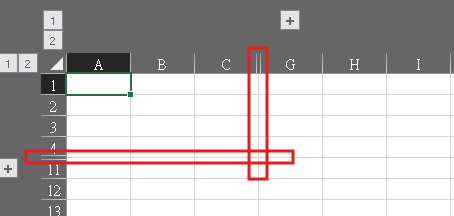

# 儲存格樣式

儲存格的樣式有下列幾個模組功能。
-  Font ：字型樣式，可以設定字體大小、字型、顏色、或是刪除線⋯等。
-  Border：框線樣式，可以設定框線樣式與色彩。
-  PatternFill：填充圖案。
-  Alignment：對齊方式。
-  Protection：保護功能，將在 7-6 節解說。

在使用上述模組前需要先導入模組：

`from openpyxl.styles import Font, Border, Side, PatternFill, Alignment, Protection`


## 字型功能

字型 Font 模組常用的參數預設值如下：
```
Font(name='Calibri',size=11, bold=False, italic=False, vertAlign=None, underline='none', strike=False, color='000000')
```

- name：字型名稱，預設是 Calibri，中文則是系統預設的新細明體。
- size：字型大小，預設是 11。
- bold：粗體，預設是 False。
- italic：斜體，預設是 False。
- vertAlign：垂直置中，預設是 None。
- underline：底線，預設是 none，單底線是 single，雙底線是 double。
- strike：刪除線，預設是 False。
- color：參數的是16位元，設定顏色時前面2個0是設定紅色（Red），中間2個0是設定綠色（Green），右邊2個0是設定藍色（Blue）

In [79]:
import openpyxl
from openpyxl.styles import Font

# fn = "示範用excel.xlsx"
# wb = openpyxl.load_workbook(fn)
wb = openpyxl.Workbook()    # 建立空白的活頁簿
ws = wb.active
ws['A1'] = 'Apple'
ws['A1'].font = Font(color='0000FF')

ws['A2'] = 'Orange'
ws['A2'].font = Font(underline='single')

ws['A3'] = "Yellow"
ws['A3'].font = Font(underline='double')

ws['A4'] = "Blue"
ws['A4'].font = Font(color='0000FF',italic=True)     

ws['A5'] = "National Cheng Kung University"
ws['A5'].font = Font(name='Times New Roman',color='0000FF')

ws['A6'] = "成功大學"
ws['A6'].font = Font(name='標楷體',color='0000FF')
wb.save("./output file/查看不同字型.xlsx")   




查看效果

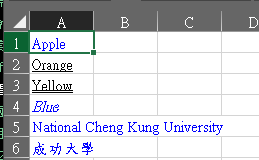

## 儲存格空線

使用框線 Border 模組時，需導入 Border 和 Side 模組：

`from openpyxl.styles import Border, Side`


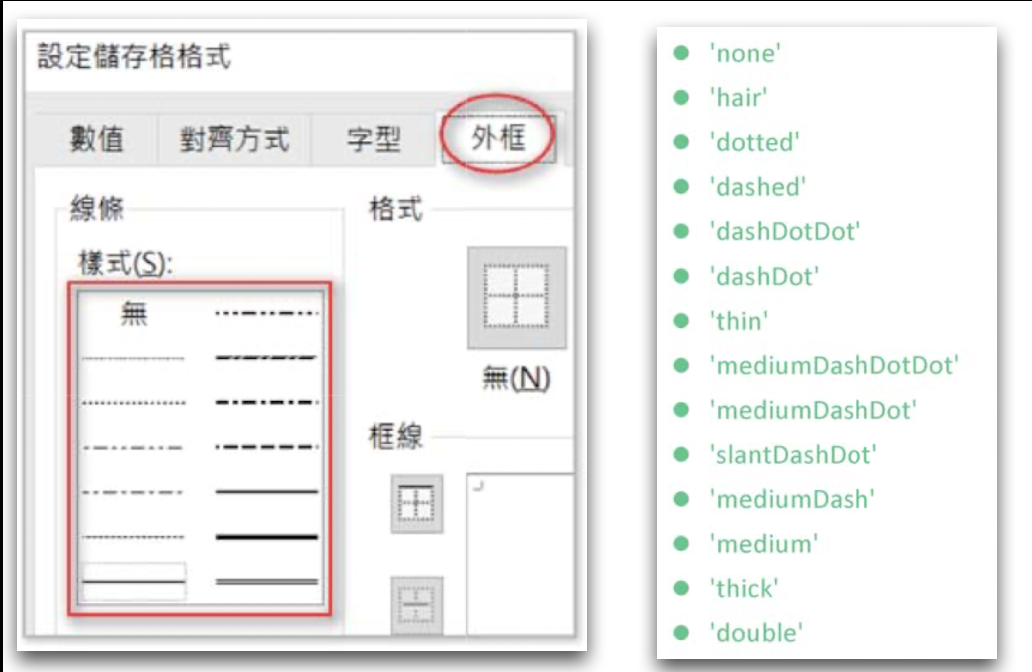


In [80]:
import openpyxl
from openpyxl.styles import Font, Border, Side

wb = openpyxl.Workbook()
ws = wb.active
# 建立含13種框線樣式的串列
border_styles = ['hair','dotted','dashed','dashDotDot',
                 'dashDot','thin','mediumDashDotDot',
                 'mediumDashDot','slantDashDot','mediumDashed', 
                 'medium','thick','double']

# 建立輸出含13個框線的列號串列
rows = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26]

for row, border_style in zip(rows, border_styles): 
    for col in [2, 4, 6]:   # B, D, F 欄        
        if col == 2:        # 如果是 B 欄, 用藍色輸出框線樣式名稱          
            ws.cell(row=row, column=col).value=border_style
            ws.cell(row=row, column=col).font = Font(color='0000FF')
        elif col == 4:      # 如果是 D 欄, 設定左上至右下的紅色對角線
            side = Side(border_style=border_style, color='FF0000')
                            # 建立左上到右下對角線物件
            diagDown = Border(diagonal=side,diagonalDown=True)
                            # 建立紅色對角線
            ws.cell(row=row, column=col).border = diagDown     
        else:               # 如果是 F 欄, 建立框線
            side = Side(border_style=border_style)
                            # 建立儲存格四周的框線
            borders = Border(left=side,right=side,top=side,bottom=side)
            ws.cell(row=row, column=col).border = borders                               
wb.save("./output file/格線示範.xlsx")

查看效果

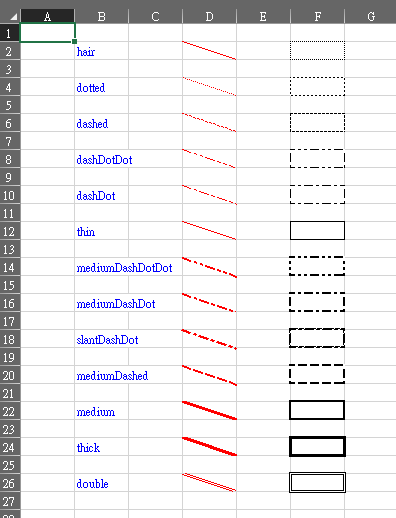

## 儲存格圖案

使用 PatternFill 模組時，需導入 PatternFill 模組：

`from openpyxi.styles import PatternFill`

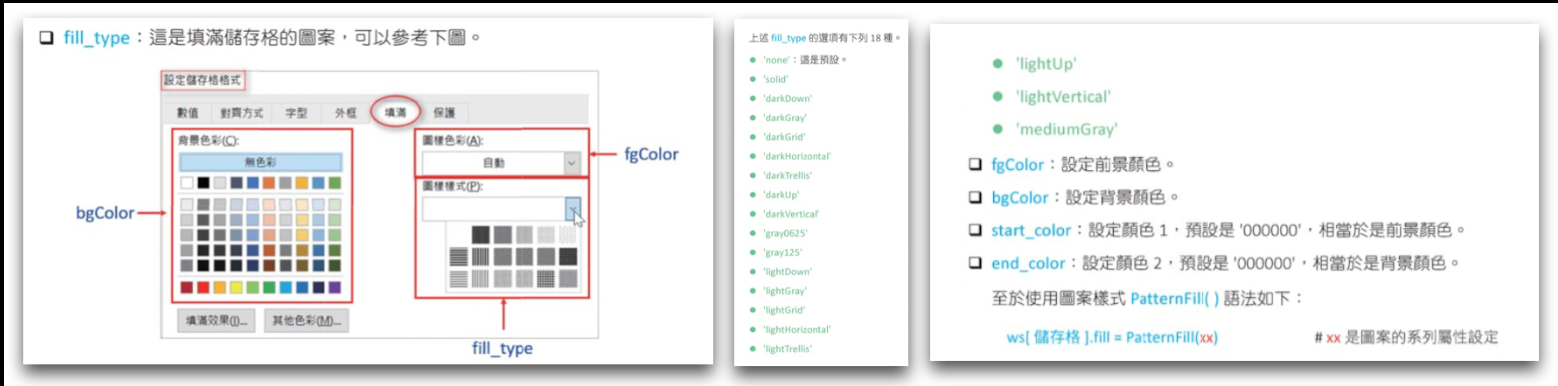

In [81]:
import openpyxl
from openpyxl.styles import PatternFill

wb = openpyxl.Workbook()
ws = wb.active

# 建立圖案樣式串列
patterns = ['solid','darkDown','darkGray',
            'darkGrid','darkHorizontal','darkTrellis',
            'darkUp','darkVertical','gray0625',
            'gray125','lightDown','lightGray',
            'lightGrid','lightHorizontal','lightTrellis',
            'lightUp','lightVertical','mediumGray']       

# 設定儲存格區間
cells = ws.iter_cols(min_row=2,max_row=20,min_col=2,max_col=3)
for col in cells:
    for cell, pattern in zip(col,patterns):         
        if cell.col_idx == 2 :  # 如果是 B 欄則輸出圖案樣式
            cell.fill = PatternFill(fill_type=pattern)     
        else:                   # 否則輸出圖案名稱
            cell.value = pattern  
wb.save("./output file/輸出儲存格樣式.xlsx")


查看效果

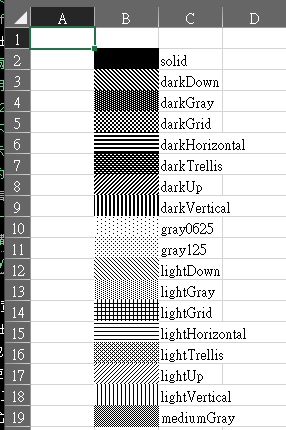

## 儲存格對齊方式

使用 Alignment 模組時，需導入 Alignment 模組：

`from openpyxl.styles import Alignment`


圖案或是漸變顏色 Alignment 模組常用的參數預設值如下：
```
Alignment（horizontal=general，vertical='bottom', text_rotation=0, wrap_text=False, shrink_to_fit=False, indent=0)
```
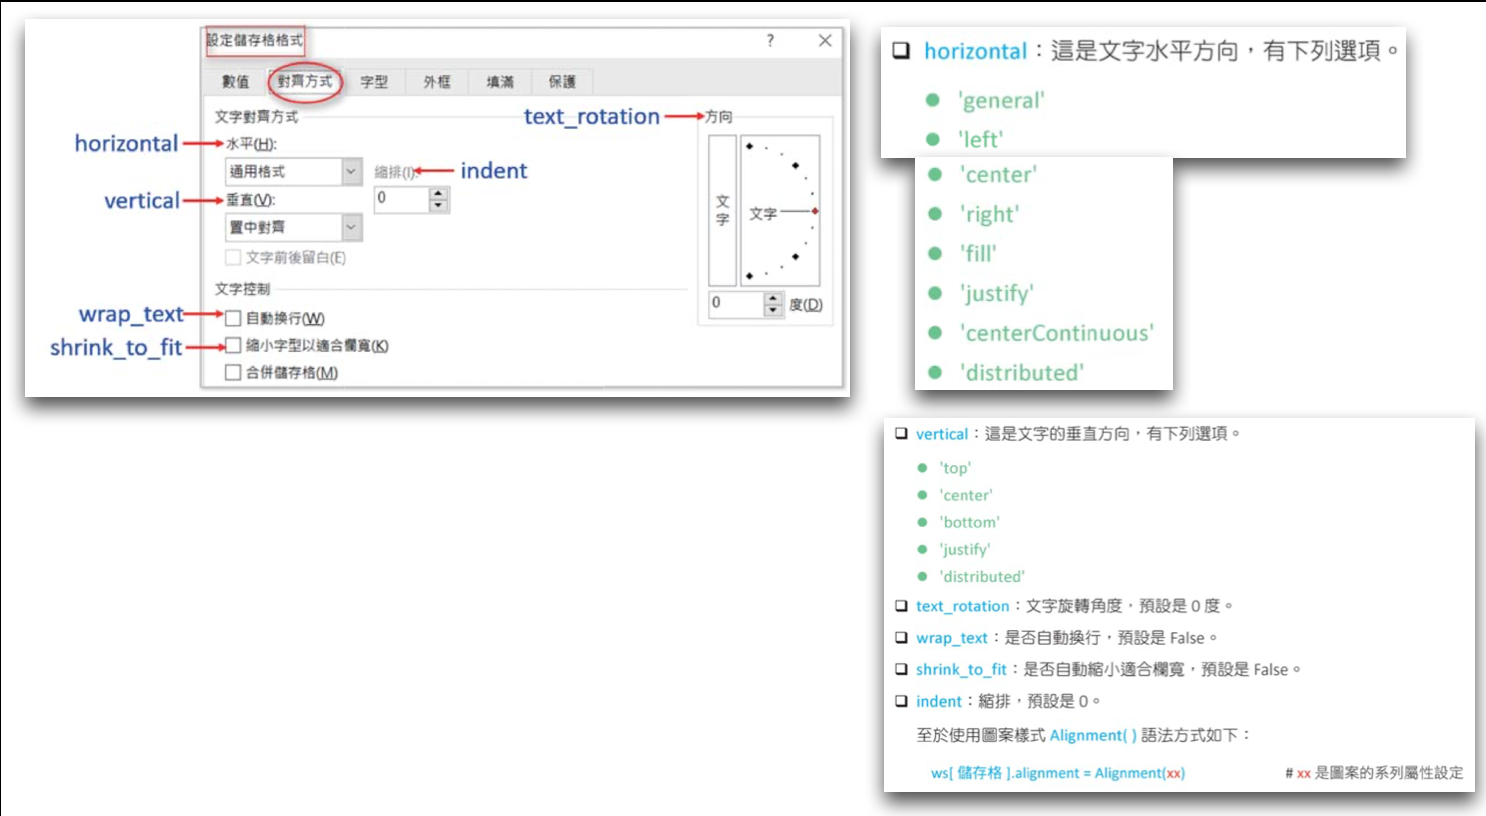

In [82]:
import openpyxl
from openpyxl.styles import Alignment


wb = openpyxl.Workbook()    # 建立空白的活頁簿
ws = wb.active
ws['B2'] = "這是B2"
ws['B2'].alignment = Alignment(horizontal='right')  

ws['C2'] = "this is C2"
ws['C2'].alignment = Alignment(horizontal='center') 

ws['D2'] = "this is D2"
ws['D2'].alignment = Alignment(horizontal='left')

ws['F2'] = "this is F2"
ws['F2'].alignment = Alignment(horizontal='centerContinuous')
wb.save("./output file/對齊方式.xlsx")

查看效果

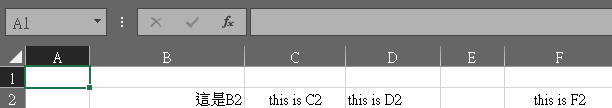

In [83]:
import openpyxl
from openpyxl.styles import Border, Side, Alignment

fn = "./input file/萵苣會員資料.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active

side = Side(border_style='thin')
borders = Border(left=side,right=side,top=side,bottom=side)
for rows in ws['B2':'C6']:
    for cell in rows:
        cell.border = borders
        cell.alignment = Alignment(horizontal='center')
wb.save("./output file/更改萵苣會員資料對其方式.xlsx")

查看效果

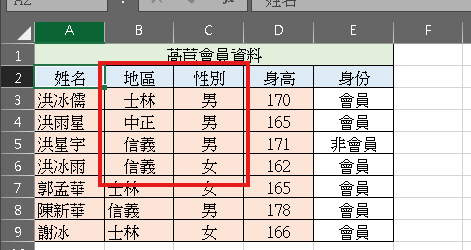

## 複製樣式

In [84]:
import openpyxl
from openpyxl.styles import Font
from copy import copy

src = Font(name='Arial', size=16)
dst = copy(src)
print(f"src = {src.name}, {src.size}")
print(f"dst = {dst.name}, {dst.size}")

src = Arial, 16.0
dst = Arial, 16.0


## 色彩

色彩可以應用在字型、前景、背景或是邊框，其實在 openpyxl模組內，內含有透明度 alpha 值，但是這並沒有應用在儲存格內。

In [85]:
import openpyxl
from openpyxl.styles import Font
from openpyxl.styles.colors import Color

fn = "./input file/萵苣會員資料.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active
ws['B1'].font = Font(color=Color(indexed=6))
ws['B2'].font = Font(underline='single')
ws['C2'].font = Font(underline='double')
ws['B3'].font = Font(color=Color(indexed=40),
                     italic=True)   
wb.save("./output file/更改萵苣會員資料字體色彩.xlsx")                      


查看效果

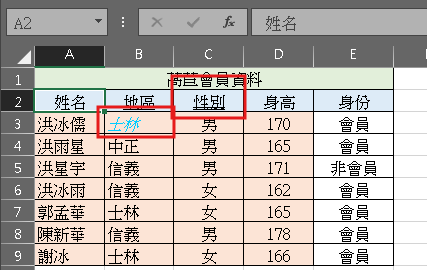

# 自訂數值格式化儲存格應用

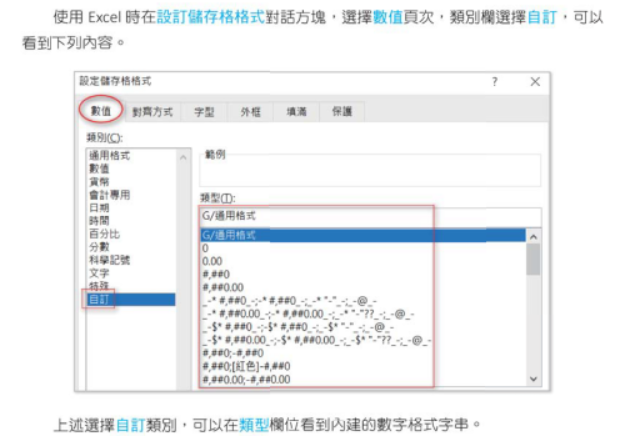

## 認識數字格式符號
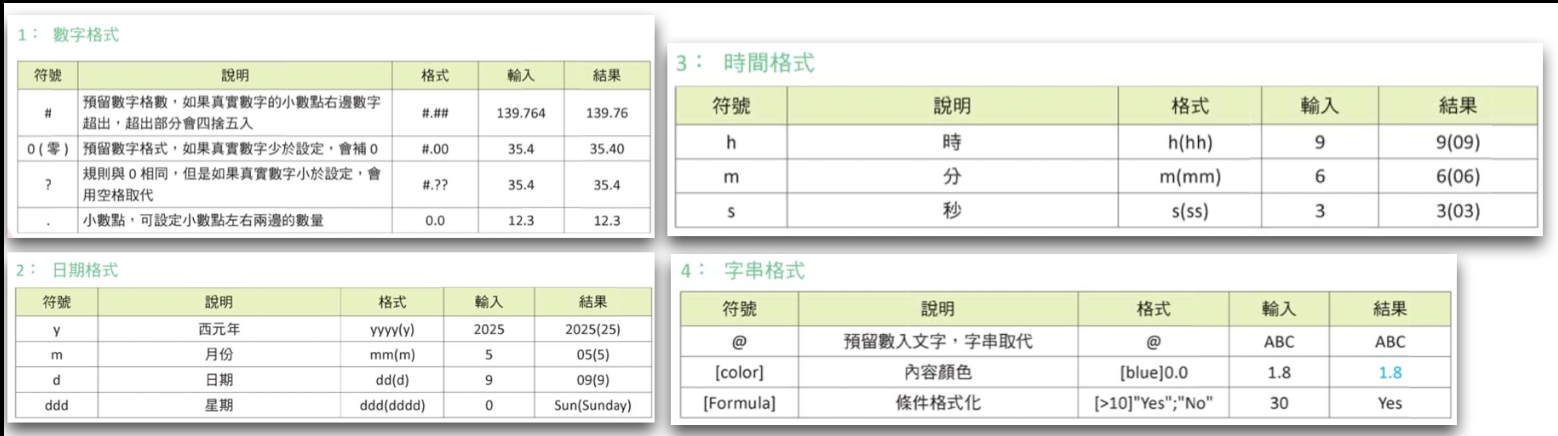

## 內建數字的符號格式
在 openpyxl.styles.numbers 模組內有 builtin_format_code（n）函數，這個函數的n值，其實是數值格式字串的索引，部分內容如下：
```
0 : 'General'
1：'0'
2：'0.00'
3：'#，##0'
•••
49：'@'
```

要使用builtin_format_code（n）函數，必需先導入此函數，方法如下：

`from openpyxl.styles.numbers import builtin_format_code`


In [1]:
import openpyxl
from openpyxl.styles.numbers import builtin_format_code
print("列出內建數字格式字串及索引")
for i in range(50):
    print(f"i = {i} : {builtin_format_code(i)}")


列出內建數字格式字串及索引
i = 0 : General
i = 1 : 0
i = 2 : 0.00
i = 3 : #,##0
i = 4 : #,##0.00
i = 5 : "$"#,##0_);("$"#,##0)
i = 6 : "$"#,##0_);[Red]("$"#,##0)
i = 7 : "$"#,##0.00_);("$"#,##0.00)
i = 8 : "$"#,##0.00_);[Red]("$"#,##0.00)
i = 9 : 0%
i = 10 : 0.00%
i = 11 : 0.00E+00
i = 12 : # ?/?
i = 13 : # ??/??
i = 14 : mm-dd-yy
i = 15 : d-mmm-yy
i = 16 : d-mmm
i = 17 : mmm-yy
i = 18 : h:mm AM/PM
i = 19 : h:mm:ss AM/PM
i = 20 : h:mm
i = 21 : h:mm:ss
i = 22 : m/d/yy h:mm
i = 23 : None
i = 24 : None
i = 25 : None
i = 26 : None
i = 27 : None
i = 28 : None
i = 29 : None
i = 30 : None
i = 31 : None
i = 32 : None
i = 33 : None
i = 34 : None
i = 35 : None
i = 36 : None
i = 37 : #,##0_);(#,##0)
i = 38 : #,##0_);[Red](#,##0)
i = 39 : #,##0.00_);(#,##0.00)
i = 40 : #,##0.00_);[Red](#,##0.00)
i = 41 : _(* #,##0_);_(* \(#,##0\);_(* "-"_);_(@_)
i = 42 : _("$"* #,##0_);_("$"* \(#,##0\);_("$"* "-"_);_(@_)
i = 43 : _(* #,##0.00_);_(* \(#,##0.00\);_(* "-"??_);_(@_)
i = 44 : _("$"* #,##0.00_)_("$"* \(#,##0.00\)_("

In [2]:
# 測試是否內建格式
import openpyxl
from openpyxl.styles.numbers import is_builtin

print(is_builtin('#,##0.00'))
print(is_builtin('0.000'))
print(is_builtin('kkk'))

True
False
False


## 測試是否內建日期字串格式
函數 is_date_format（）可以測試字串是否內建日期字串格式，使用這個函數前需要導入此模組，如下：

`from openpyxl.styles.numbers import is_date_format`


In [3]:
import openpyxl
from openpyxl.styles.numbers import is_date_format

print(is_date_format('#,##0.00'))
print(is_date_format('mm-dd-yy'))
print(is_date_format('yy-mm-dd'))
print(is_date_format('d-mm-yy'))

False
True
True
True


## 測試是否內建日期/時間字串格式

函數 is_datetime（）可以測試字串是否內建日期/時間字串格式，使用這個函數前需要導入此模組，如下：

`from openpyxl.styles.numbers import is_datetime`

註: 日期或是時間格式皆算符合。

In [4]:
import openpyxl
from openpyxl.styles.numbers import is_date_format

print(is_date_format('mm:ss'))
print(is_date_format('mm-dd-yy'))
print(is_date_format('#0.00'))
print(is_date_format('d-mm-yy'))

True
True
False
True


In [5]:
# 獲得格式字串編號
import openpyxl
from openpyxl.styles.numbers import builtin_format_id

print(builtin_format_id('mm:ss'))
print(builtin_format_id('mm-dd-yy'))
print(builtin_format_id('0.00%'))
print(builtin_format_id('0.00'))
print(builtin_format_id('00.00'))
print(builtin_format_id('d-mm-yy'))

45
14
10
2
None
None


In [6]:
# 更改儲存格格式
import openpyxl

# 建立一個新的工作簿
wb = openpyxl.Workbook()
ws = wb.active

# 填入數值 123.456
ws['B2'] = 123.456
ws['B3'] = 123.456
ws['B4'] = 123.456
ws['B5'] = 123.456
ws['B6'] = 123.456
ws['B7'] = 123.456
ws['B8'] = 123.456

# 設置儲存格的格式
ws['B2'].number_format = '#.##'
ws['B3'].number_format = '#.##'
ws['B4'].number_format = '#0.##'
ws['B5'].number_format = '#0.##'
ws['B6'].number_format = '000.00'
ws['B7'].number_format = '#.00'
ws['B8'].number_format = '[Red]#.00'


# 保存工作簿
wb.save("./output file/更改儲存格格式.xlsx")


In [7]:
# 更改日期格式
import openpyxl

# 建立一個新的工作簿
wb = openpyxl.Workbook()
ws = wb.active

ws['B2'] = ws['B3'] = ws['B4'] = ws['B5'] = "2024/06/24"
ws['B6'] = ws['B7'] = "18:10"

ws['B2'].number_format = 'm/d/yy'
ws['B3'].number_format = 'mm-dd-yyyy'
ws['B4'].number_format = 'yyyy-mm-dd'
ws['B5'].number_format = 'd-mmm-yy'
ws['B6'].number_format = 'h:mm AM/PM'
ws['B7'].number_format = 'h:mm'
wb.save("./output file/日期格式.xlsx")

In [8]:
# 讀取格式
import openpyxl

fn = "./output file/更改儲存格格式.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active
for i in range(2,9):
    index = 'B' + str(i)
    print(f"{index} : {ws[index].number_format}")

B2 : #.##
B3 : #.##
B4 : #0.##
B5 : #0.##
B6 : 000.00
B7 : #.00
B8 : [Red]#.00


In [9]:
# 與日期模組做應用
import openpyxl
import datetime

wb = openpyxl.Workbook()
ws = wb.active
ws.column_dimensions['B'].width = 40
ws['B2'] = datetime.datetime.today()
ws['B3'] = datetime.datetime.today()
ws['B3'].number_format = 'yyyy-mm-dd hh:mm:ss'
ws['B4'] = datetime.datetime.today()
ws['B4'].number_format = 'yyyy年mm月dd日 hh時mm分ss秒'

for row in ws.iter_rows(min_row=2, max_row=4, min_col=2, max_col=2):
    for cell in row:
        print(f"Cell {cell.coordinate}: {cell.value} (Formatted: {cell.number_format})")


Cell B2: 2024-06-21 01:19:50.635389 (Formatted: yyyy-mm-dd h:mm:ss)
Cell B3: 2024-06-21 01:19:50.635389 (Formatted: yyyy-mm-dd hh:mm:ss)
Cell B4: 2024-06-21 01:19:50.635389 (Formatted: yyyy年mm月dd日 hh時mm分ss秒)


# 公式運用

查看可以解析的函數

In [10]:
import openpyxl
from openpyxl.utils import FORMULAE

print(type(FORMULAE))
print(len(FORMULAE))
print(FORMULAE)

<class 'frozenset'>
352
frozenset({'LENB', 'SYD', 'FISHER', 'RIGHTB', 'IPMT', 'DAYS360', 'UPPER', 'DAVERAGE', 'NORMINV', 'ROWS', 'MEDIAN', 'HEX2DEC', 'COUNTIF', 'WEIBULL', 'ERROR.TYPE', 'ISREF', 'MDETERM', 'LARGE', 'DCOUNT', 'ISNONTEXT', 'EFFECT', 'TRIMMEAN', 'CONCATENATE', 'TBILLPRICE', 'HARMEAN', 'INDEX', 'GROWTH', 'DAY', 'ASIN', 'ASC', 'IMDIV', 'IMPRODUCT', 'WORKDAY ', 'NOMINAL', 'ODDLPRICE', 'MMULT', 'TBILLEQ', 'ACOS', 'OFFSET', 'FORECAST', 'PROPER', 'ATANH', 'XIRR', 'MID', 'EDATE', 'LOG10', 'PV', 'COLUMNS', 'DB', 'ISEVEN', 'BETAINV', 'DVAR', 'CONFIDENCE', 'DOLLAR', 'TIME', 'LOWER', 'TODAY', 'CHIINV', 'SUM', 'TRUE ADDRESS', 'ISBLANK', 'YIELD', 'EOMONTH', 'CUBERANKEDMEMBER', 'COLUMN', 'COMPLEX', 'NOW', 'OCT2HEX', 'ROUND', 'CODE', 'AMORDEGRC', 'POISSON', 'SLN', 'PMT', 'TAN', 'GAMMAINV', 'VARPA', 'IMPOWER', 'FALSE', 'TREND', 'SINH', 'IMLOG2', 'ODDLYIELD', 'SQRTPI', 'BAHTTEXT', 'LOGNORMDIST', 'DDB', 'DGET', 'FLOOR', 'INDIRECT', 'CHAR', 'OCT2BIN', 'PERMUT', 'SUBSTITUTE', 'LOGEST', 'IMLN

In [11]:
# 檢查函數是否可以使用
import openpyxl
from openpyxl.utils import FORMULAE

print(f"TODAY : {'TODAY' in FORMULAE}")
print(f"today : {'today' in FORMULAE}")
print(f"SUM   : {'SUM' in FORMULAE}")
print(f"sum   : {'sum' in FORMULAE}")
print(f"TEST  : {'TEST' in FORMULAE}")

TODAY : True
today : False
SUM   : True
sum   : False
TEST  : False


## 在工作表內使用函數

但他的計算結果，無法用print的方式拿出來

In [25]:
import openpyxl

fn = "./input file/海綿寶寶業績表.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active

for r in ws.iter_rows(values_only=True):  print(r)  # 執行前輸出
print()
ws['C7'] = "=SUM(C4:C6)"
# ws.cell(row=7,column=3,value="=SUM(C4:C6)")
wb.save("./output file/單欄計算總和公式.xlsx")

(None, None, None, None, None, None, None)
(None, '海綿寶寶業績表', None, None, None, None, None)
(None, '地區', '第一季', '第二季', '第三季', '第四季', '小計')
(None, '北區', 60000, 70000, 65000, 72000, None)
(None, '中區', 32000, 35000, 38000, 45000, None)
(None, '南區', 35000, 41000, 38000, 32000, None)
(None, '總計', None, None, None, None, None)



In [30]:
import openpyxl
from openpyxl.utils import get_column_letter

fn = "./input file/海綿寶寶業績表.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active
for i in range(3,7):
    ch = get_column_letter(i)       # 將數字轉成欄位
    index = ch + str(7)
    start_index = ch + str(4)
    end_index = ch + str(6)
    ws[index] = "=SUM({}:{})".format(start_index,end_index)
wb.save("./output file/所有欄計算總和公式.xlsx")


## 計算年資

使用 DATEDIF（）函數可以計算兩個時間的差距，此差距可以返回年、月、日、不滿一年的月數、不滿一年的日數、不滿一個月的日數，函數的使用格式如下：

`DATEDIF（ 起始日，終止日，單位）`

上述參數單位使用方式如下：
- Y：傳回完整的年數
- M：傳回完整的月數
- D：傳回完整的日數
- YM：傳回不滿一年的月數
- YD：傳回不滿一年的日數
- MD：傳回不滿一個月的日數

In [31]:
import openpyxl

fn = "./input file/計算年資表.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active
ws['C3'] = "=TODAY()"
ws['C3'].number_format = 'yyyy/m/d'
ws['E6'] = '=DATEDIF(D6,$C$3,"Y")'
ws['F6'] = '=DATEDIF(D6,$C$3,"YM")'
ws['G6'] = '=DATEDIF(D6,$C$3,"MD")'
wb.save("./output file/計算年資表輸出.xlsx")

## 計算銷售排名
Excel 提供排序函數 RANK（），我們可以由這個函數很快速列出商品的銷售排名資料。這個函數的語法如下：

`RANK（數值，範圍，排序方法）`

In [32]:
import openpyxl

fn = "./input file/銷售排名.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active
ws['E4'] = "=RANK(D4,$D$4:$D$9)"
wb.save("./output file/銷售排名輸出.xlsx")

## 業績排名

建立總業績、最高業績和最低業績資訊。

In [33]:
import openpyxl

fn = "./input file/業績排名.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active
ws['C7'] = "=SUM(C4:C6)"
ws['C8'] = "=MAX(C4:C6)"
ws['C9'] = "=MIN(C4:C6)"
wb.save("./output file/業績排名輸出.xlsx")

## 考試成績統計


In [34]:
import openpyxl

wb = openpyxl.Workbook()            # 建立空白的活頁簿
ws = wb.active                      # 獲得目前工作表
ws['A1'] = 'Peter'                  # 設定名字Peter           
ws['B1'] = 98
ws['A2'] = 'Janet'                  # 設定名字Janet
ws['B2'] = 79
ws['A3'] = 'Nelson'                 # 設定名字Nelson
ws['B3'] = 81
ws['A4'] = '總分'
ws['B4'] = '=SUM(B1:B3)'            # 計算總分
ws['A5'] = '平均'
ws['B5'] = '=AVERAGE(B1:B3)'        # 計算平均
ws['A6'] = '最高分'
ws['B6'] = '=MAX(B1:B3)'            # 計算最高分
ws['A7'] = '最低分'
ws['B7'] = '=MIN(B1:B3)'            # 計算最低分
wb.save('./output file/考試成績統計.xlsx')            # 將活頁簿儲存

# 資料驗證模組

資料驗證的模組是`DataValidation`，使用前需要導入此模組。
```
from openpyxl.worksheet.datavalidation import Datavalidation
```

導入上述模組後，就可以使用 Datavalidation（）函數建立資料驗證物件，語法如下：
```
dv = DataValidation(type, operator, formulal, formula2, allow_blank)
```

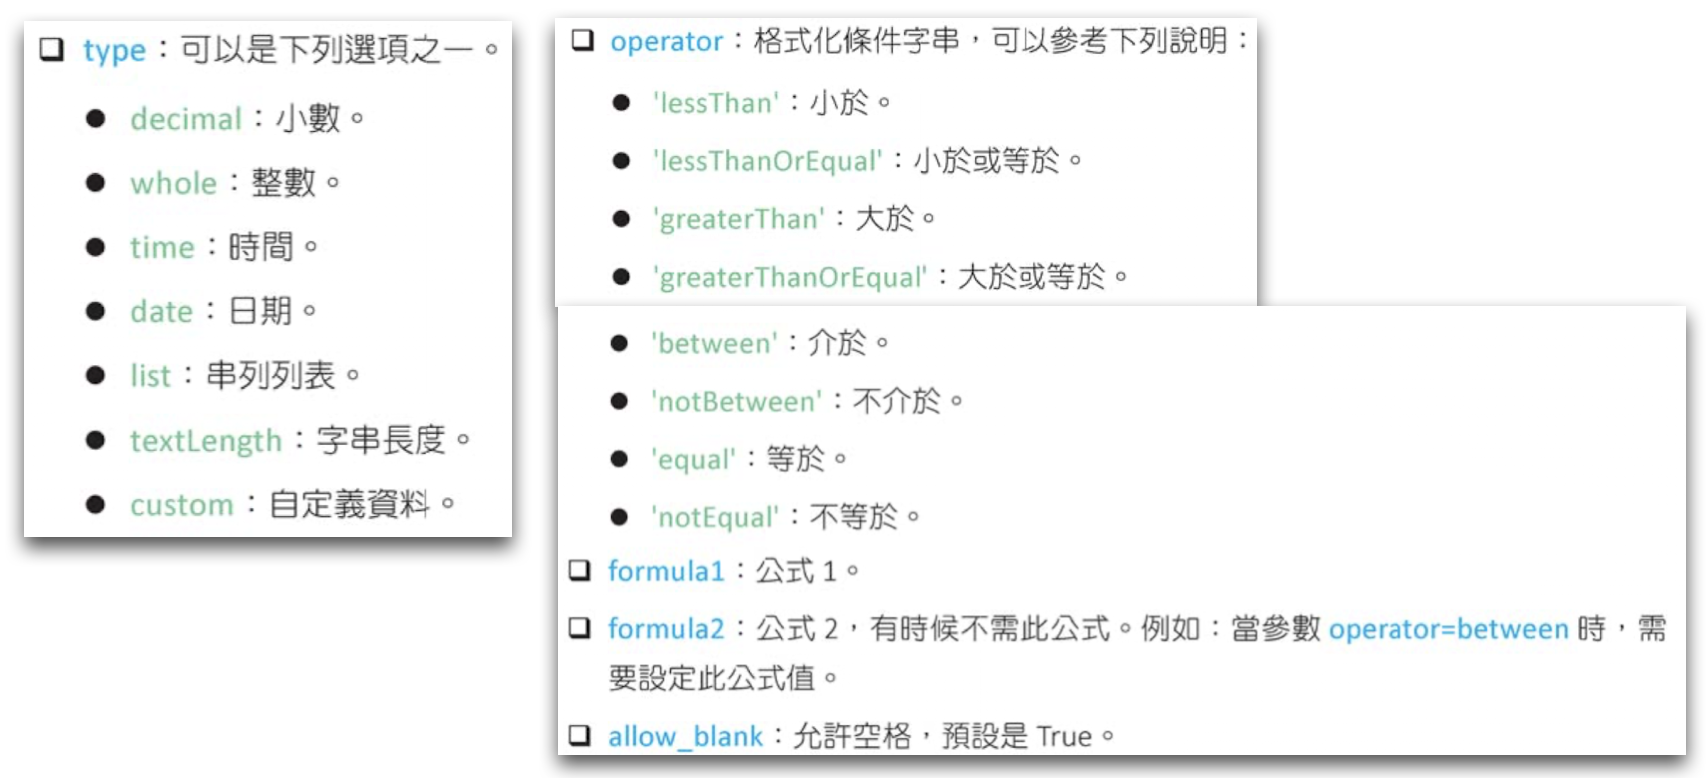


In [1]:
# D3:D4 儲存格區間，限制輸入 75元至500元之間的計程車資。
import openpyxl
from openpyxl.worksheet.datavalidation import DataValidation

fn = "./input file/計程車車資.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active
# 建立資料驗證 DataValidation物件
dv = DataValidation(type="whole",         
                    operator="between",
                    formula1=75,
                    formula2=500)
dv.add('D3:D4')                 # 設定資料驗證儲存格區間
ws.add_data_validation(dv)      # 將資料驗證加入工作表
# 儲存結果
wb.save('./output file/計程車車資.xlsx')


## 建立輸入提醒

既然儲存格要建立資料驗證，建議可以為要驗證的儲存格區間建立輸入提醒，可以使用資料驗證物件的下列屬性：
- `promptTitle` 屬性可以為驗證區塊建立輸入提醒的標題。
- `prompt` 屬性可以為驗證區塊建立輸入提醒的內容。

In [2]:
import openpyxl
from openpyxl.worksheet.datavalidation import DataValidation

fn = "./input file/計程車車資.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active
# 建立資料驗證 DataValidation物件
dv = DataValidation(type="whole",         
                    operator="between",
                    formula1=75,
                    formula2=500)
dv.promptTitle = '請輸入計程車資'
dv.prompt = '請輸入75 - 500之間'
dv.add('D3:D4')                 # 設定資料驗證儲存格區間
ws.add_data_validation(dv)      # 將資料驗證加入工作表
# 儲存結果
wb.save('./output file/計程車車資增加輸入提醒.xlsx')

## 驗證日期的資料輸入

In [3]:
import openpyxl
from openpyxl.worksheet.datavalidation import DataValidation
import datetime

fn = "./input file/大鳳梨員工資料表.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active

# 建立資料驗證 DataValidation物件
dv = DataValidation(type="date",         
                    operator="lessThan",
                    formula1="TODAY()")
dv.promptTitle = '輸入日期'
dv.prompt = '請輸入到職日期'
dv.add('C4')                    # 設定資料驗證儲存格區間
ws.add_data_validation(dv)      # 將資料驗證加入工作表
# 儲存結果
wb.save('./output file/驗證時間輸入大鳳梨員工資料表.xlsx')


## 客製化錯誤輸入提醒

- `errorTitle` 屬性：可以設定錯誤提醒的標題。
- `error` 屬性：可以設定錯誤提醒的內容。

In [4]:
import openpyxl
from openpyxl.worksheet.datavalidation import DataValidation
import datetime

fn = "./input file/大鳳梨員工資料表.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active

# 建立資料驗證 DataValidation物件
dv = DataValidation(type="date",         
                    operator="lessThan",
                    formula1="TODAY()")

dv.promptTitle = '輸入日期'
dv.prompt = '請輸入到職日期'
dv.errorTitle = "輸入日期錯誤"
dv.error = "不可以輸入未來日期"
dv.add('C4')                    # 設定資料驗證儲存格區間
ws.add_data_validation(dv)      # 將資料驗證加入工作表
# 儲存結果
wb.save('./output file/客製化錯誤提醒大鳳梨員工資料表.xlsx')

## 將儲存格改為選擇清單輸入

In [7]:
import openpyxl
from openpyxl.worksheet.datavalidation import DataValidation
from openpyxl.styles import PatternFill

fn = "./input file/員工選擇部門性別.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active

# 建立 部門 資料驗證 DataValidation物件
dv = DataValidation(type="list",         
                    formula1='"財務,研發,業務"',
                    allow_blank=True)
dv.add('C4:C5')                 # 設定資料驗證儲存格區間
ws.add_data_validation(dv)      # 將資料驗證加入工作表

# 建立 性別 資料驗證 DataValidation物件
dv = DataValidation(type="list",         
                    formula1='"男,女"',
                    allow_blank=True)
dv.add('D4:D5')                 # 設定資料驗證儲存格區間
ws.add_data_validation(dv)      # 將資料驗證加入工作表

# 增加黃色背景提醒
# 加上黃色背景
for row in ws['C4:D5']:
    for cell in row:
        cell.fill = PatternFill(fill_type='solid',
                                fgColor="FFFF00")
        
# 儲存結果
wb.save('./output file/員工增加選擇清單.xlsx')

# 工作表列印相關工作

## 置中列印

下列指令可以讓工作表編輯區域水平和垂直置中列印。
```
ws.print_options.horizontalCentered = True  # 水平置中
ws.print_options.verticalCentered = True ＃ 垂直置中
```


## 工作表列印屬性


```
ws.page_setup.firstPageNumber = 1 # 起始真是 1
ws.page_setup.PrinterDefaults = True ＃使用預設的印表機
ws.page_setup.blackAndWhite = True ＃黑白列印
ws.page_setup.orientation = "landscape" ＃列印方向是橫向
ws.page_setup.paperHeight = 297 ＃紙張高度
ws.page_setup.paperWidth = 410 ＃紙張寬度
```

In [9]:
# 黑白橫向列印
import openpyxl

fn = "./input file/冰品銷售調查表.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active

ws.page_setup.orientation = "landscape" # 橫向列印
ws.page_setup.blackAndWhite = True # 黑白列印

wb.save("./output file/橫向列印冰品銷售調查表.xlsx")

## 設定列印區域

工作表物件的屬性 `print_area` 可以設定列印區域。

In [10]:
import openpyxl

fn = "./input file/統計大資料.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active

ws.print_area = "A4:E9"
wb.save("./output file/部分列印.xlsx")

## 設定頁首頁尾

### oddHeader：可以設定頁首。
```
ws.oddHeader.right.text # 可以設定頁首右邊的文字。
ws.oddHeader.right.size # 可以設定頁首右邊的文字大小。
ws.oddHeader.right.font # 可以設定頁首右邊的文字字型。
ws.oddHeader.right.color # 可以設定頁首右邊的文字顏色。
ws.evenHeader.center.text # 偶數頁頁首中間文字。
ws.firstHeader.center.text # 奇數頁頁首中間文字。

```
### oddFooter：可以設定真尾。

```
ws.oddFooter.center.text # 可以設定頁尾中間的文字。
ws.oddFooter.center.size # 可以設定真尾中間的文字大小。
ws.oddFooter.center.font # 可以設定真尾中間的文字字型。
ws.oddFooter.center.color # 可以設定頁尾中間的文字顏色。
ws.evenFooter.center.text # 偶數頁頁尾中間文字。
ws.firstFooter.center.text # 奇數頁頁尾中間文字。
```

### 文字設定的標記碼

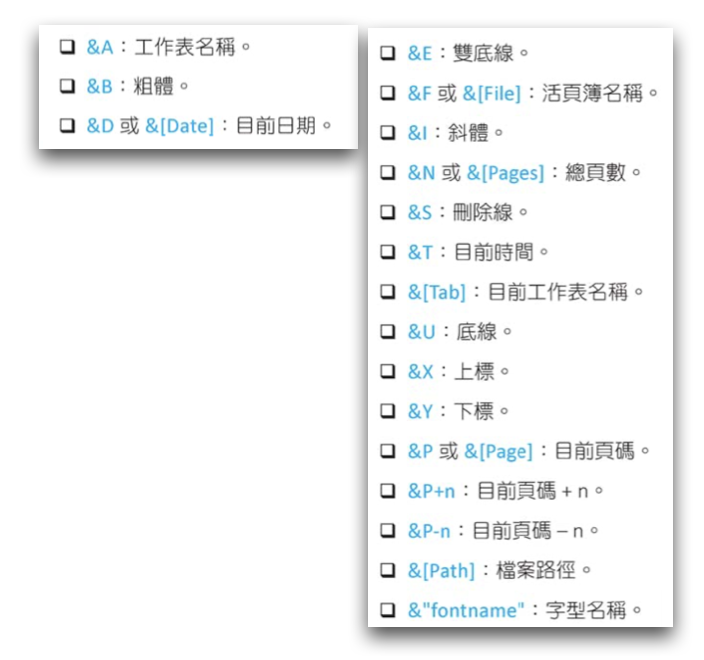

In [11]:
# 設定左邊頁首
import openpyxl

fn = "./input file/統計大資料.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active

ws.oddHeader.left.text = "Page &[Page] of &N"
ws.oddHeader.left.size = 14
ws.oddHeader.left.font = "Old English Text MT"
ws.oddHeader.left.color = "0000FF"
wb.save("./output file/增加頁首.xlsx")

In [12]:
# 設定右邊頁尾
import openpyxl

fn = "./input file/統計大資料.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active

ws.oddFooter.right.text = "&A Page-&P"
ws.oddFooter.right.size = 14
ws.oddFooter.right.font = "Old English Text MT"
ws.oddFooter.right.color = "0000FF"
wb.save("./output file/增加頁尾.xlsx")